# HR EMPLOYEE ATTRITION - MACHINE LEARNING
Data taken from : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. In this section we will try to find the best and proper model to predict the employee who're churned or not churned.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

## IMPORT LIBRARIES

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold , cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import scipy.stats as ss
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
from scipy.stats import mannwhitneyu, chi2_contingency
from scipy.stats import anderson
from imblearn.over_sampling import SMOTE

from yellowbrick.model_selection import learning_curve, ValidationCurve

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=FutureWarning)

## OVERVIEW

> First, I'll load the previously cleaned dataset.

In [2]:
df = pd.read_csv('attrition_ready.csv')

In [3]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,College,Medium,...,19479,8,11,0,8,0,6,4,0,5
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Below College,High,...,24907,1,23,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,College,Very High,...,2396,6,15,0,7,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Master,Very High,...,23159,1,11,0,8,3,8,7,3,0
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Below College,Low,...,16632,9,12,1,6,3,2,2,2,2


In [4]:
df.tail()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,College,High,...,12290,4,17,1,17,3,5,2,0,3
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,Below College,Very High,...,21457,4,15,1,9,5,7,7,1,7
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,Bachelor,Medium,...,5174,1,20,1,6,0,6,2,0,3
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,Bachelor,Very High,...,13243,2,14,0,17,3,9,6,0,8
1469,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Bachelor,Medium,...,10228,2,12,0,6,3,4,3,1,2


> The cleaned data, means that there are no Null Values. Also the data type and feature descriptions are matched with each other.

In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique(), 
              'uniqueSample' : [list(df[i].drop_duplicates().sample(2))for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,unique,uniqueSample
0,Attrition,object,0,2,"[Yes, No]"
1,BusinessTravel,object,0,3,"[Travel_Frequently, Non-Travel]"
2,Department,object,0,3,"[Human Resources, Research & Development]"
3,EducationField,object,0,6,"[Technical Degree, Other]"
4,Gender,object,0,2,"[Female, Male]"
5,JobRole,object,0,9,"[Manager, Laboratory Technician]"
6,MaritalStatus,object,0,3,"[Divorced, Single]"
7,OverTime,object,0,2,"[No, Yes]"
8,Education,object,0,5,"[Below College, Doctor]"
9,EnvironmentSatisfaction,object,0,4,"[Very High, Low]"


> The `describe()` is to show the general information to this data once again.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0


In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054
Education,1470,5,Bachelor,572
EnvironmentSatisfaction,1470,4,High,453


> Before moving on to **Feature Engineering** part, I'd rather split the data in two categories, splitted by their data type for easier view.

In [8]:
df_cat = df.select_dtypes('object')
df_con = df.select_dtypes('int64', 'float64')

In [9]:
df_cat.head(8).T

,0,1,2,3,4,5,6,7
Attrition,Yes,No,Yes,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences
Gender,Female,Male,Male,Female,Male,Male,Female,Male
JobRole,Sales Executive,Research Scientist,Laboratory Technician,Research Scientist,Laboratory Technician,Laboratory Technician,Laboratory Technician,Laboratory Technician
MaritalStatus,Single,Married,Single,Married,Married,Single,Married,Divorced
OverTime,Yes,No,Yes,Yes,No,No,Yes,No
Education,College,Below College,College,Master,Below College,College,Bachelor,Below College
EnvironmentSatisfaction,Medium,High,Very High,Very High,Low,Very High,High,Very High


In [10]:
df_con.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Age,41,49,37,33,27,32,59,30,38,36,35,29,31,34,28,29,32,22,53,38
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,809,153,670,1346,103,1389,334,1123,1219,371
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,16,15,26,19,24,21,5,16,2,2
HourlyRate,94,61,92,56,40,79,81,67,44,94,84,49,31,93,50,51,80,96,78,45
MonthlyIncome,5993,5130,2090,2909,3468,3068,2670,2693,9526,5237,2426,4193,2911,2661,2028,9980,3298,2935,15427,3944
MonthlyRate,19479,24907,2396,23159,16632,11864,9964,13335,8787,16577,16479,12682,15170,8758,12947,10195,15053,7324,22021,4306
NumCompaniesWorked,8,1,6,1,9,0,4,1,0,6,0,0,1,0,5,1,0,1,2,5
PercentSalaryHike,11,23,15,11,12,13,20,22,21,13,13,12,17,11,14,11,12,13,16,11
StockOptionLevel,0,1,0,0,1,0,3,1,0,2,1,0,1,1,0,1,2,2,0,0
TotalWorkingYears,8,10,7,8,6,8,12,1,10,17,6,10,5,3,6,10,7,1,31,6


## FEATURE ENGINEERING

### NORMALITY AND OUTLIER CHECK

In [11]:
def normal(df):
    
    stat = anderson(df)[0]
    cval = anderson(df)[1][2]
    if stat < cval :
        print('NORMALLY Distributed for ' + i + ' Variable')
    else :
        print('NOT NORMALLY Distributed for ' + i + ' Variable')

In [12]:
for i in df_con.columns :
    normal(df_con[i])

NOT NORMALLY Distributed for Age Variable
NOT NORMALLY Distributed for DailyRate Variable
NOT NORMALLY Distributed for DistanceFromHome Variable
NOT NORMALLY Distributed for HourlyRate Variable
NOT NORMALLY Distributed for MonthlyIncome Variable
NOT NORMALLY Distributed for MonthlyRate Variable
NOT NORMALLY Distributed for NumCompaniesWorked Variable
NOT NORMALLY Distributed for PercentSalaryHike Variable
NOT NORMALLY Distributed for StockOptionLevel Variable
NOT NORMALLY Distributed for TotalWorkingYears Variable
NOT NORMALLY Distributed for TrainingTimesLastYear Variable
NOT NORMALLY Distributed for YearsAtCompany Variable
NOT NORMALLY Distributed for YearsInCurrentRole Variable
NOT NORMALLY Distributed for YearsSinceLastPromotion Variable
NOT NORMALLY Distributed for YearsWithCurrManager Variable


<Figure size 864x360 with 0 Axes>

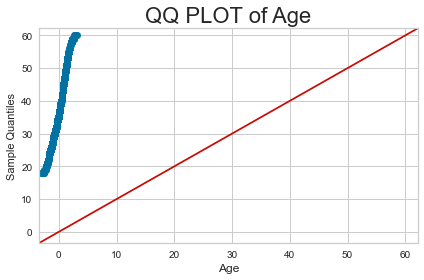

<Figure size 864x360 with 0 Axes>

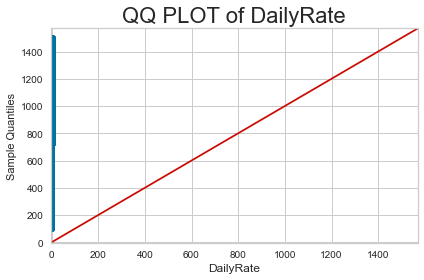

<Figure size 864x360 with 0 Axes>

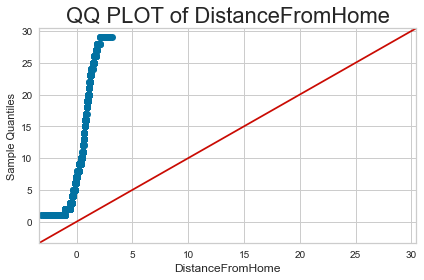

<Figure size 864x360 with 0 Axes>

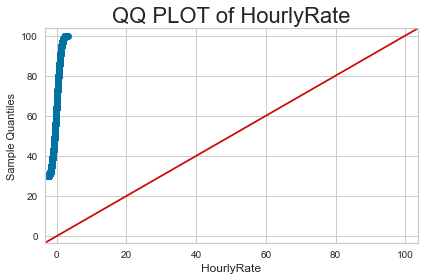

<Figure size 864x360 with 0 Axes>

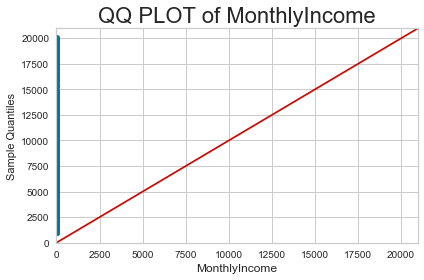

<Figure size 864x360 with 0 Axes>

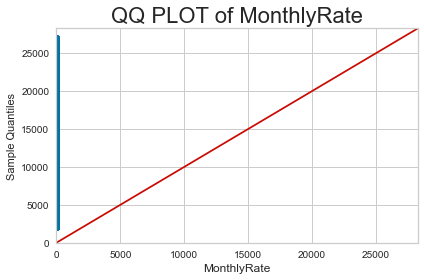

<Figure size 864x360 with 0 Axes>

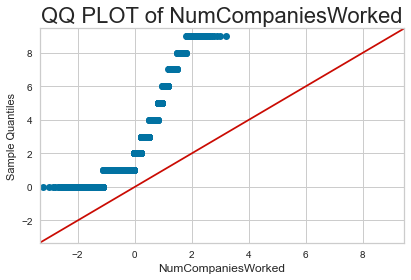

<Figure size 864x360 with 0 Axes>

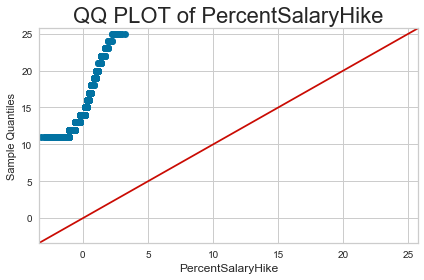

<Figure size 864x360 with 0 Axes>

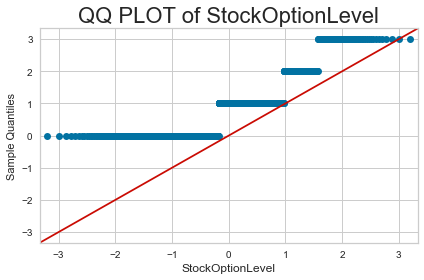

<Figure size 864x360 with 0 Axes>

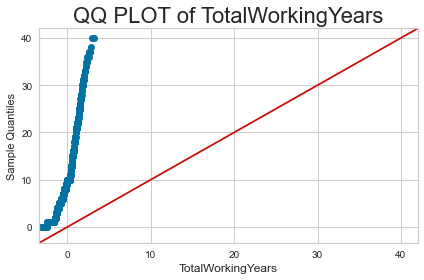

<Figure size 864x360 with 0 Axes>

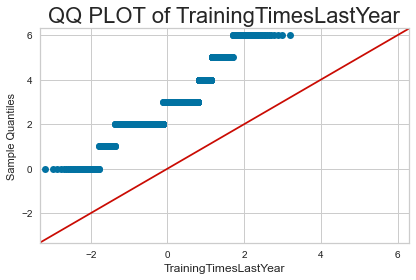

<Figure size 864x360 with 0 Axes>

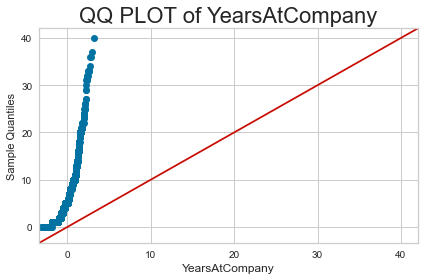

<Figure size 864x360 with 0 Axes>

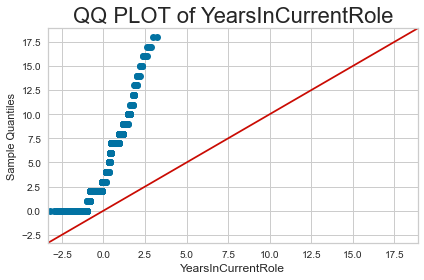

<Figure size 864x360 with 0 Axes>

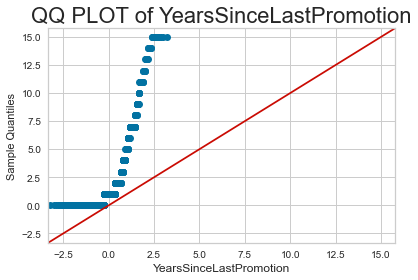

<Figure size 864x360 with 0 Axes>

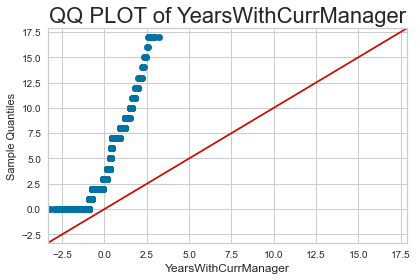

In [13]:
for i in df_con.columns :
    
    plt.figure(figsize = (12,5))
    
    sm.qqplot(df[i], line = '45')
    plt.xlabel(i, fontsize = 12)
    plt.title('QQ PLOT of ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> All of the features are not normally distributed. Now, let's check the outliers.

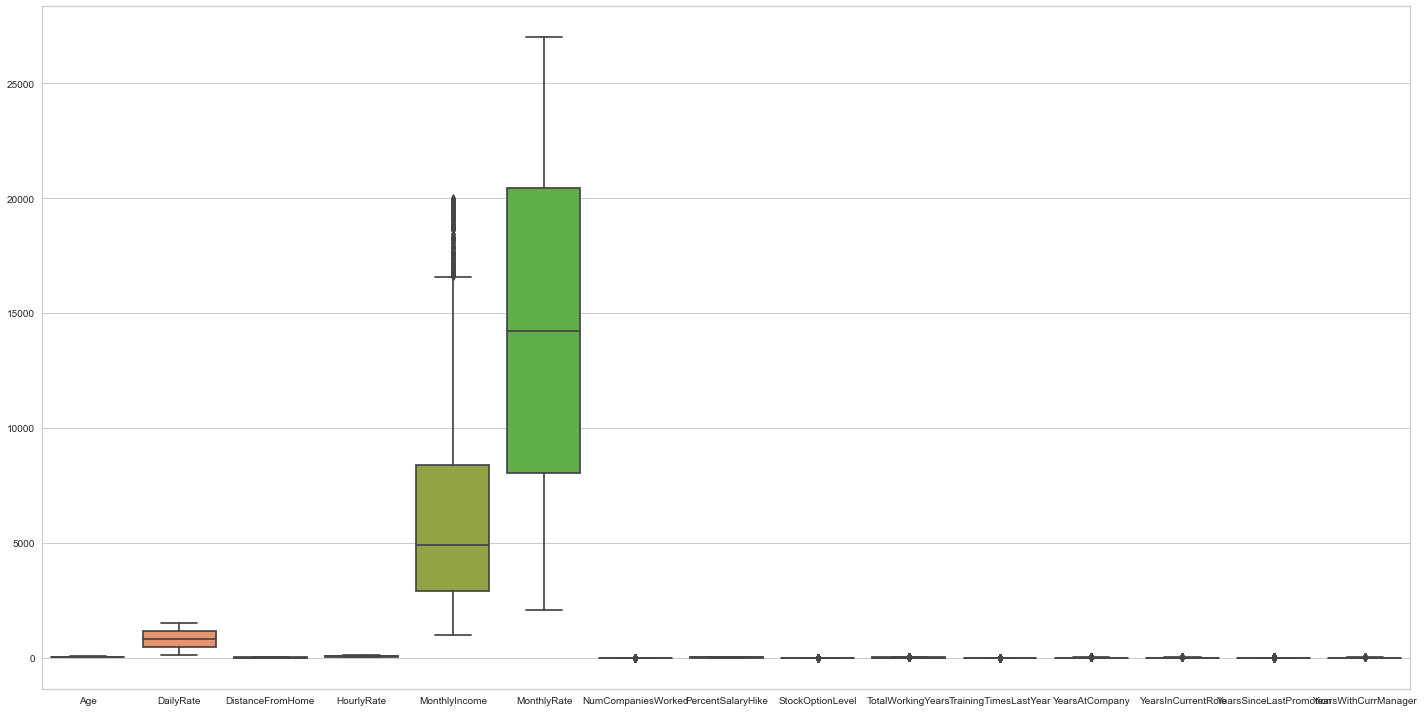

In [14]:
plt.figure(figsize = (20,10))
sns.boxplot(data=df_con)
plt.tight_layout()
plt.show()

> By the looks of it, we can see that this data are not on the same scale, moreover there are outliers on **MonthlyIncome**. Let's check it manually.

In [15]:
def outliers(df):
    Q2 = np.quantile(df, 0.50)
    Q1 = np.quantile(df, 0.25)
    Q3 = np.quantile(df, 0.75)
    
    IQR   = (Q3 - Q1) * 1.5
    lower =  Q1 - IQR
    upper =  Q3 + IQR 

    outlier = ''
    for i in range(len(df)):
        if df[i] > upper :
            outlier = outlier + str(df[i]) + ', '
        if df[i] < lower :
            outlier = outlier + str(df[i]) + ', '
    return len(outlier)

In [16]:
for i in df_con.columns:
    outlier = outliers(df_con[i])
    print(f'There are {outlier} Outliers on {i} Features')

There are 0 Outliers on Age Features
There are 0 Outliers on DailyRate Features
There are 0 Outliers on DistanceFromHome Features
There are 0 Outliers on HourlyRate Features
There are 798 Outliers on MonthlyIncome Features
There are 0 Outliers on MonthlyRate Features
There are 156 Outliers on NumCompaniesWorked Features
There are 0 Outliers on PercentSalaryHike Features
There are 255 Outliers on StockOptionLevel Features
There are 252 Outliers on TotalWorkingYears Features
There are 714 Outliers on TrainingTimesLastYear Features
There are 416 Outliers on YearsAtCompany Features
There are 84 Outliers on YearsInCurrentRole Features
There are 393 Outliers on YearsSinceLastPromotion Features
There are 56 Outliers on YearsWithCurrManager Features


> Manually check the outliers, we can see that there are many other outliers in many features not only **MonthlyIncome** features. We'll handle it later using the right method.

### LABELLING

> Now we start the labelling process, we'll scan for the nominal and ordinal data on the categorical data. Then use `pd.get_dummies()` and `LabelEncoder()` respectively.

In [17]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   EducationField            1470 non-null   object
 4   Gender                    1470 non-null   object
 5   JobRole                   1470 non-null   object
 6   MaritalStatus             1470 non-null   object
 7   OverTime                  1470 non-null   object
 8   Education                 1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   object
 10  JobInvolvement            1470 non-null   object
 11  JobSatisfaction           1470 non-null   object
 12  PerformanceRating         1470 non-null   object
 13  RelationshipSatisfaction  1470 non-null   object
 14  WorkLifeBalance         

> I'll locate the nominal and ordinal data first.

In [18]:
df_nom = df_cat[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]
df_ord = df_cat.drop(df_nom, axis = 1)

In [19]:
df_nom.head(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


> I'll use `pd.get_dummies()` on this nominal data.

In [20]:
for i in df_nom:
    df_nom = pd.get_dummies(df_nom, drop_first = True)

In [21]:
df_nom.head(3)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1


> I'll use `LabelEncoder()` on this ordinal data.

In [22]:
df_ord.head(3)

,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,JobLevel
0,Yes,College,Medium,High,Very High,Excellent,Low,Bad,Officer
1,No,Below College,High,Medium,Medium,Outstanding,Very High,Better,Officer
2,Yes,College,Very High,Medium,High,Excellent,Medium,Better,Staff


In [23]:
for i in df_ord.columns:
    encoder = LabelEncoder()
    df_ord[i] = encoder.fit_transform(df_ord[i])

In [24]:
df_ord.head(3)

,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,JobLevel
0,1,2,2,0,3,0,1,0,2
1,0,1,0,2,2,1,3,2,2
2,1,2,3,2,0,0,2,2,4


> As we can see that the labelling process already completed. Now to the next process, I'll use `pd.concat()` to concatenate all the categorical data, then I'll do the same for the numerical data.

In [25]:
df_cat_new = pd.concat([df_nom, df_ord], axis = 1)

In [26]:
df_cat_new.head(3)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,OverTime_Yes,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,JobLevel
0,0,1,0,1,1,0,0,0,0,0,...,1,1,2,2,0,3,0,1,0,2
1,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,2,2,1,3,2,2
2,0,1,1,0,0,0,0,1,0,1,...,1,1,2,3,2,0,0,2,2,4


In [27]:
df_ready = pd.concat([df_cat_new, df_con], axis = 1)

In [28]:
df_ready.head(3)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,19479,8,11,0,8,0,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,24907,1,23,1,10,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,2396,6,15,0,7,3,0,0,0,0


> Now that we've completed this process. We can start the feature selection process.

### FEATURE IMPORTANCE

> In this process, we will select 10 best feature to predict the target feature, **Attrition**. I will be using *Tree-based Classifier*.

In [29]:
X = df_ready.drop(['Attrition'], axis = 1)
y = df_ready['Attrition']

[0.02142004 0.01389458 0.00998169 0.00954756 0.01683015 0.01096846
 0.01741463 0.00580163 0.01300321 0.02072053 0.00593079 0.01653172
 0.00349844 0.00641913 0.00296534 0.01033898 0.0098754  0.01275903
 0.01392289 0.02843556 0.06335746 0.0248278  0.03096599 0.02526887
 0.03114142 0.01233245 0.03038115 0.03393859 0.03280184 0.03646299
 0.02823744 0.03295034 0.02922869 0.04050927 0.02826609 0.02928554
 0.02835355 0.02785225 0.0334003  0.02686342 0.03475299 0.02902834
 0.029715   0.02981846]


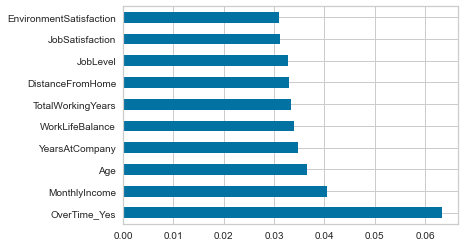

In [30]:
# feature importances using Tree Based Classifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

> Above, we can see that we are getting our top 10 features to predict the target. I'll get this into a new dataframe so that we can start the machine learning process.

In [31]:
feat_col = feat_importances.nlargest(10).index.tolist()
feat_tgt = pd.DataFrame(df_ready['Attrition'])

In [32]:
df_new = pd.concat([df_ready[feat_col], feat_tgt], axis=1)

In [33]:
df_new.head()

,OverTime_Yes,MonthlyIncome,Age,YearsAtCompany,WorkLifeBalance,TotalWorkingYears,DistanceFromHome,JobLevel,JobSatisfaction,EnvironmentSatisfaction,Attrition
0,1,5993,41,6,0,8,1,2,3,2,1
1,0,5130,49,10,2,10,8,2,2,0,0
2,1,2090,37,0,2,7,2,4,0,3,1
3,1,2909,33,8,2,8,3,4,0,3,0
4,0,3468,27,2,2,6,2,4,2,1,0


> I'll drop the data into a new csv file for hyperparameter testing.

In [34]:
df_new.to_csv('attrition_HP.csv', index = False)

## MODELLING

> First off, we'll split the target feature from other features, then we'll split the data to 80% train and 20% test data.

### SPLIT DATA FOR MODELLING

In [35]:
# Split target - predictors

X = df_new.drop(['Attrition'], axis = 1)
y = df_new['Attrition']

In [36]:
print(X, y)

      OverTime_Yes  MonthlyIncome  Age  YearsAtCompany  WorkLifeBalance  \
0                1           5993   41               6                0   
1                0           5130   49              10                2   
2                1           2090   37               0                2   
3                1           2909   33               8                2   
4                0           3468   27               2                2   
...            ...            ...  ...             ...              ...   
1465             0           2571   36               5                2   
1466             0           9991   39               7                2   
1467             1           6142   27               6                2   
1468             0           5390   49               9                3   
1469             0           4404   34               4                1   

      TotalWorkingYears  DistanceFromHome  JobLevel  JobSatisfaction  \
0                     8    

In [37]:
#Split train data 80%, test data 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 101)

> Below, I'll start the preparation by setting the default model and the hyperparameter tuned model.

### MODEL PREPARATION

In [38]:
# Random Forest Classifier model with default parameter

RFC = RandomForestClassifier().fit(X_train, y_train)

# XGBoost Classifier with default parameter

XGC = XGBClassifier().fit(X_train, y_train)

In [39]:
# Random Forest Classifier model with previously tuned hyperparameter

hyper_RFC = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 4, max_depth = 10).fit(X_train, y_train)

# XGBoost Classifier model with previously tuned hyperparameter

hyper_XGC = XGBClassifier(reg_lambda=1, reg_alpha = 40, n_estimators = 180, min_child_weight = 10, max_depth = 3, gamma = 1, colsample_bytree = 0.5, seed = 0).fit(X_train, y_train)

### CROSS VALIDATION

> Before going further, we'll need to check whether there are any overfit or underfit problem using **Kfold** cross-validation.

In [40]:
# Train data

RFC_score_tr = RFC.score(X_train, y_train)
XGC_score_tr = XGC.score(X_train, y_train)
hyper_RFC_score_tr = hyper_RFC.score(X_train, y_train)
hyper_XGC_score_tr = hyper_XGC.score(X_train, y_train)

In [41]:
# Test data

RFC_score_ts = RFC.score(X_test, y_test)
XGC_score_ts = XGC.score(X_test, y_test)
hyper_RFC_score_ts = hyper_RFC.score(X_test, y_test)
hyper_XGC_score_ts = hyper_XGC.score(X_test, y_test)

In [42]:
train_score = pd.DataFrame({'Model' : ['Random Forest', 'XGBoost'], 
                            'Normal': [RFC_score_tr, XGC_score_tr], 
                            'Hyper' : [hyper_RFC_score_tr, hyper_XGC_score_tr]})

In [43]:
test_score = pd.DataFrame({'Model' : ['Random Forest', 'XGBoost'], 
                           'Normal': [RFC_score_ts, XGC_score_ts], 
                           'Hyper' : [hyper_RFC_score_ts, hyper_XGC_score_ts]})

In [44]:
pd.concat([train_score, test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  Random Forest  1.000000  0.898810
            1        XGBoost  1.000000  0.836735
Test Score  0  Random Forest  0.833333  0.840136
            1        XGBoost  0.826531  0.846939

> It seems that there are overfitting problem on default model. I'll check below.

In [45]:
# Check overfit on default data

cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
RFC_kfold = cross_val_score(RFC, X_train, y_train, cv = cv, scoring = 'accuracy')
XGC_kfold = cross_val_score(XGC, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'RFC kfold' : RFC_kfold.tolist(),
              'SVM kfold' : XGC_kfold.tolist()})

,RFC kfold,SVM kfold
0,0.838983,0.830508
1,0.822034,0.830508
2,0.855932,0.813559
3,0.889831,0.872881
4,0.822034,0.805085
5,0.881356,0.838983
6,0.820513,0.820513
7,0.871795,0.880342
8,0.888889,0.880342
9,0.786325,0.777778


> Yes it seems that there are overfitting. Lets visualize it using `learning_curve()`.

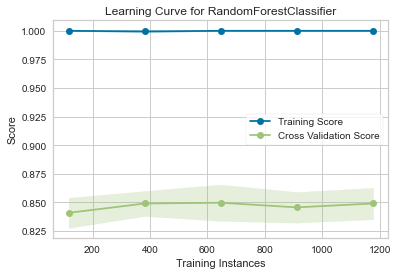

In [46]:
learning_curve(RFC, X, y, scoring='accuracy')
plt.show()

> Seeing above plot, there are obviously an overfitting on Random Forest model.

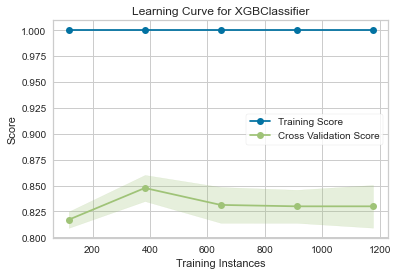

In [47]:
learning_curve(XGC, X, y, scoring='accuracy')
plt.show()

> There are overfitting on XGB default model, just like Random Forest.

In [48]:
pd.DataFrame({'Model' : ['Random Forest', 'XGBoost'], 
              'Hyper': [RFC_score_tr, XGC_score_tr], 
              'Mean Kfold' : [RFC_kfold.mean(), XGC_kfold.mean()]})

,Model,Hyper,Mean Kfold
0,Random Forest,1.0,0.847769
1,XGBoost,1.0,0.835050


> By seeing the `learning_curve()` and Kfold Cross Validation above, we can clearly see the overfitting on these models using default parameter. Now we examine the hyperparameter tuned model and see if it's actually better than the default one.

In [49]:
# Check overfit on hyperparameter tuned data

cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
hyper_RFC_kfold = cross_val_score(hyper_RFC, X_train, y_train, cv = cv, scoring = 'accuracy')
hyper_XGC_kfold = cross_val_score(hyper_XGC, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'Hyper RFC kfold' : hyper_RFC_kfold.tolist(),
              'Hyper SVM kfold' : hyper_XGC_kfold.tolist()})

,Hyper RFC kfold,Hyper SVM kfold
0,0.830508,0.838983
1,0.830508,0.838983
2,0.838983,0.838983
3,0.889831,0.838983
4,0.822034,0.830508
5,0.881356,0.830508
6,0.829060,0.837607
7,0.863248,0.837607
8,0.888889,0.837607
9,0.820513,0.837607


> I'd say that these are rather stable result. But let's check the learning curves.

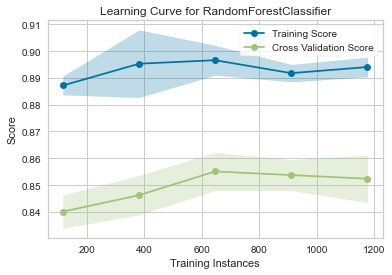

In [50]:
learning_curve(hyper_RFC, X, y, scoring='accuracy')
plt.show()

> Well there are some differences on Random Forest, but it's tolerable.

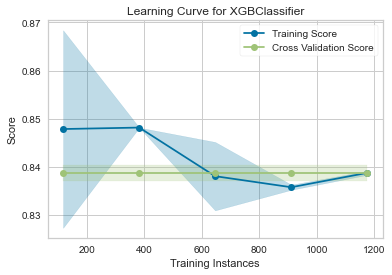

In [51]:
learning_curve(hyper_XGC, X, y, scoring='accuracy')
plt.show()

> By seeing above plot on XGBoost model, we can infer that there are no overfitting while using the hyperparameter tuned model.

In [52]:
pd.DataFrame({'Model' : ['Random Forest', 'Support Vector'], 
              'Hyper': [hyper_RFC_score_tr, hyper_XGC_score_tr], 
              'Mean Kfold' : [hyper_RFC_kfold.mean(), hyper_XGC_kfold.mean()]})

,Model,Hyper,Mean Kfold
0,Random Forest,0.898810,0.849493
1,Support Vector,0.836735,0.836738


> Although there still are some overfitting on Random Forest, but it's still within a tolerable amount. Therefore using hyperparameter tuned on both model is a better choice than using the defaut one.

## MODEL PREDICTION AND PERFORMANCE EVALUATION

> I'll start the process by setting the prediction for every models.

In [53]:
# Random Forest Classifier
yp_RFC = hyper_RFC.predict(X_test)

# Support Vector Machine Classifier
yp_XGC = hyper_XGC.predict(X_test)

> Now, we'll check the model and evaluate it. Starting from Random Forest Classifier.

### RANDOM FOREST CLASSIFIER

In [54]:
labels = ['Attrition No', 'Attrition Yes']

In [55]:
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[241,   8],
       [ 39,   6]], dtype=int64)

               precision    recall  f1-score   support

 Attrition No       0.86      0.97      0.91       249
Attrition Yes       0.43      0.13      0.20        45

     accuracy                           0.84       294
    macro avg       0.64      0.55      0.56       294
 weighted avg       0.79      0.84      0.80       294



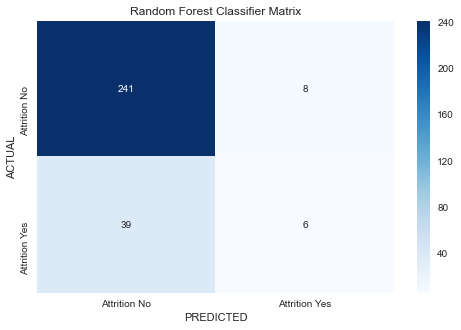

In [56]:
print(classification_report(y_test, yp_RFC, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier Matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> I think this Random Forest model still is not performs as expected. I'll try to do something later, but for now let's move to the other model.

### XGBOOST CLASSIFIER

In [57]:
cm_XGC = confusion_matrix(y_test, yp_XGC)
cm_XGC

array([[249,   0],
       [ 45,   0]], dtype=int64)

               precision    recall  f1-score   support

 Attrition No       0.85      1.00      0.92       249
Attrition Yes       0.00      0.00      0.00        45

     accuracy                           0.85       294
    macro avg       0.42      0.50      0.46       294
 weighted avg       0.72      0.85      0.78       294



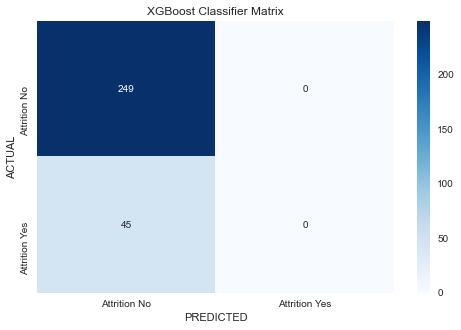

In [58]:
print(classification_report(y_test, yp_XGC, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_XGC, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('XGBoost Classifier Matrix')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> This model also did not performs well. Therefore we can try several method to tackle this.

## OVERSAMPLING - SMOTE

> Since the data are not balanced, I'll try the oversampling technique using SMOTE first.

In [59]:
# Oversampling with SMOTE 

X_train_sm, y_train_sm = SMOTE(random_state = False).fit_sample(X_train, y_train)

# Random Forest Classifier model with previously tuned hyperparameter - oversampled

hyper_RFC_sm = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 4, max_depth = 10).fit(X_train_sm, y_train_sm)

# XGBoost Classifier model with previously tuned hyperparameter - oversampled

hyper_XGC_sm = XGBClassifier(reg_lambda=1, reg_alpha = 40, n_estimators = 180, min_child_weight = 10, max_depth = 3, gamma = 1, colsample_bytree = 0.5, seed = 0).fit(X_train_sm, y_train_sm)

In [60]:
# Predict using Random Forest Classifier - oversampled

yp_RFC_sm = hyper_RFC_sm.predict(X_test)

# Predict using XGBoost Classifier - oversampled

yp_XGC_sm = hyper_XGC_sm.predict(X_test)

> I'll check for overfitting first.

In [61]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
hyper_RFC_kfold_sm = cross_val_score(hyper_RFC_sm, X_train, y_train, cv = cv, scoring = 'accuracy')
hyper_XGC_kfold_sm = cross_val_score(hyper_XGC_sm, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'RFC kfold - Oversampled' : hyper_RFC_kfold_sm.tolist(),
              'XGC kfold - Oversampled' : hyper_XGC_kfold_sm.tolist()})

,RFC kfold - Oversampled,XGC kfold - Oversampled
0,0.864407,0.838983
1,0.830508,0.838983
2,0.847458,0.838983
3,0.898305,0.838983
4,0.813559,0.830508
5,0.889831,0.830508
6,0.820513,0.837607
7,0.854701,0.837607
8,0.880342,0.837607
9,0.820513,0.837607


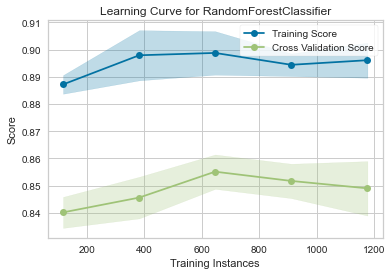

In [62]:
learning_curve(hyper_RFC_sm, X, y, scoring='accuracy')
plt.show()

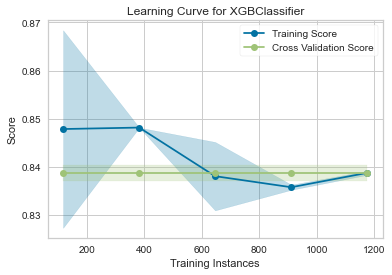

In [63]:
learning_curve(hyper_XGC_sm, X, y, scoring='accuracy')
plt.show()

> Seeing scores and learning curves above, we can see that these models are quite stable just like before.

               precision    recall  f1-score   support

 Attrition No       0.89      0.86      0.87       249
Attrition Yes       0.35      0.42      0.38        45

     accuracy                           0.79       294
    macro avg       0.62      0.64      0.63       294
 weighted avg       0.81      0.79      0.80       294



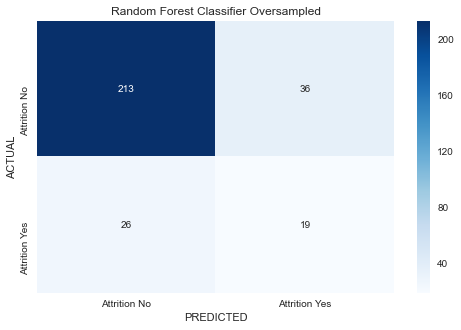

In [64]:
# Model evaluation

print(classification_report(y_test, yp_RFC_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_RFC_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier Oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

               precision    recall  f1-score   support

 Attrition No       0.90      0.81      0.85       249
Attrition Yes       0.32      0.51      0.40        45

     accuracy                           0.76       294
    macro avg       0.61      0.66      0.62       294
 weighted avg       0.81      0.76      0.78       294



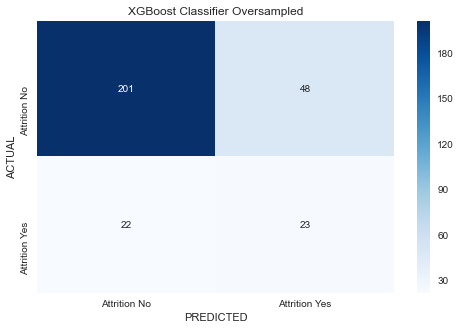

In [65]:
# Model evaluation

print(classification_report(y_test, yp_XGC_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_XGC_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('XGBoost Classifier Oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Seems that we've already got a better result using SMOTE. But I whink this is not quite good, I'll try to scale the data using `RobustScaler()` as we already know that this data got many outliers. Maybe the outliers are affecting the model.

## SCALING

>We will scale the data so that we'll get the same data scale as well as handling the outliers.

In [66]:
df_new.head()

,OverTime_Yes,MonthlyIncome,Age,YearsAtCompany,WorkLifeBalance,TotalWorkingYears,DistanceFromHome,JobLevel,JobSatisfaction,EnvironmentSatisfaction,Attrition
0,1,5993,41,6,0,8,1,2,3,2,1
1,0,5130,49,10,2,10,8,2,2,0,0
2,1,2090,37,0,2,7,2,4,0,3,1
3,1,2909,33,8,2,8,3,4,0,3,0
4,0,3468,27,2,2,6,2,4,2,1,0


In [85]:
df_scl = df_new.drop(columns = ['OverTime_Yes', 'JobLevel', 'WorkLifeBalance', 'EnvironmentSatisfaction'])

In [86]:
df_scl.head()

,MonthlyIncome,Age,YearsAtCompany,TotalWorkingYears,DistanceFromHome,JobSatisfaction,Attrition
0,5993,41,6,8,1,3,1
1,5130,49,10,10,8,2,0
2,2090,37,0,7,2,0,1
3,2909,33,8,8,3,0,0
4,3468,27,2,6,2,2,0


> I'll start scaling the data using **Robust Scaler**.

In [87]:
for i in df_scl.drop(columns = ['Attrition']):
    scaler = RobustScaler()
    df_scl[i] = scaler.fit_transform(df_scl[[i]])

In [88]:
df_scl.head()

,MonthlyIncome,Age,YearsAtCompany,TotalWorkingYears,DistanceFromHome,JobSatisfaction,Attrition
0,0.196416,0.384615,0.166667,-0.222222,-0.500000,0.333333,1
1,0.038588,1.000000,0.833333,0.000000,0.083333,0.000000,0
2,-0.517374,0.076923,-0.833333,-0.333333,-0.416667,-0.666667,1
3,-0.367593,-0.230769,0.500000,-0.222222,-0.333333,-0.666667,0
4,-0.265362,-0.692308,-0.500000,-0.444444,-0.416667,0.000000,0


> As we can see the data are already being scaled. Now I'll make new dataframe to contain this scaled data. 

In [89]:
df_lab = df_new.drop(df_scl, axis = 1)
df_new_scl = pd.concat([df_scl, df_lab], axis = 1)

In [90]:
df_new_scl.head()

,MonthlyIncome,Age,YearsAtCompany,TotalWorkingYears,DistanceFromHome,JobSatisfaction,Attrition,OverTime_Yes,WorkLifeBalance,JobLevel,EnvironmentSatisfaction
0,0.196416,0.384615,0.166667,-0.222222,-0.500000,0.333333,1,1,0,2,2
1,0.038588,1.000000,0.833333,0.000000,0.083333,0.000000,0,0,2,2,0
2,-0.517374,0.076923,-0.833333,-0.333333,-0.416667,-0.666667,1,1,2,4,3
3,-0.367593,-0.230769,0.500000,-0.222222,-0.333333,-0.666667,0,1,2,4,3
4,-0.265362,-0.692308,-0.500000,-0.444444,-0.416667,0.000000,0,0,2,4,1


## MODELLING - SCALED DATA

> I'll split the data first and quickly start the process.

In [91]:
X2 = df_new_scl.drop(['Attrition'], axis = 1)
y2 = df_new_scl['Attrition']

In [92]:
#Split train data 80%, test data 20%

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = .8, random_state = 101)

In [93]:
# Oversampling with SMOTE 

X2_train_sm, y2_train_sm = SMOTE(random_state = False).fit_sample(X2_train, y2_train)

# Random Forest Classifier model with previously tuned hyperparameter - oversampled

hyper_RFC2_sm = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 4, max_depth = 10).fit(X2_train_sm, y2_train_sm)

# XGBoost Classifier model with previously tuned hyperparameter - oversampled

hyper_XGC2_sm = XGBClassifier(reg_lambda=1, reg_alpha = 40, n_estimators = 180, min_child_weight = 10, max_depth = 3, gamma = 1, colsample_bytree = 0.5, seed = 0).fit(X2_train_sm, y2_train_sm)

In [94]:
# Predict using Random Forest Classifier - oversampled

yp_RFC2_sm = hyper_RFC2_sm.predict(X2_test)

# Predict using XGBoost Classifier - oversampled

yp_XGC2_sm = hyper_XGC2_sm.predict(X2_test)

> I'll check for overfitting first.

In [95]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
hyper_RFC2_kfold_sm = cross_val_score(hyper_RFC2_sm, X2_train, y2_train, cv = cv, scoring = 'accuracy')
hyper_XGC2_kfold_sm = cross_val_score(hyper_XGC2_sm, X2_train, y2_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'RFC kfold - Oversampled' : hyper_RFC2_kfold_sm.tolist(),
              'SVM kfold - Oversampled' : hyper_XGC2_kfold_sm.tolist()})

,RFC kfold - Oversampled,SVM kfold - Oversampled
0,0.864407,0.838983
1,0.838983,0.838983
2,0.838983,0.838983
3,0.906780,0.838983
4,0.830508,0.830508
5,0.881356,0.830508
6,0.820513,0.837607
7,0.854701,0.837607
8,0.888889,0.837607
9,0.811966,0.837607


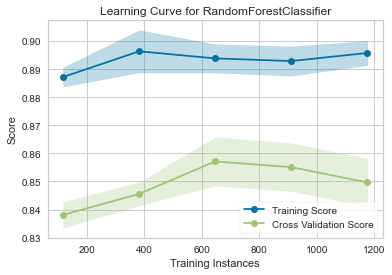

In [96]:
learning_curve(hyper_RFC2_sm, X, y, scoring='accuracy')
plt.show()

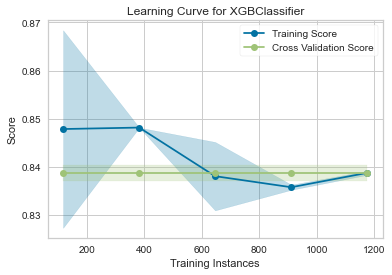

In [97]:
learning_curve(hyper_XGC2_sm, X, y, scoring='accuracy')
plt.show()

> These models are quite stable just like before. No problem here.

               precision    recall  f1-score   support

 Attrition No       0.89      0.88      0.88       249
Attrition Yes       0.38      0.42      0.40        45

     accuracy                           0.81       294
    macro avg       0.64      0.65      0.64       294
 weighted avg       0.81      0.81      0.81       294



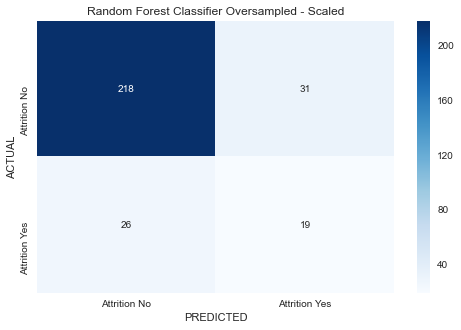

In [98]:
# Model evaluation

print(classification_report(y2_test, yp_RFC2_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y2_test, yp_RFC2_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier Oversampled - Scaled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

               precision    recall  f1-score   support

 Attrition No       0.91      0.80      0.85       249
Attrition Yes       0.35      0.58      0.43        45

     accuracy                           0.77       294
    macro avg       0.63      0.69      0.64       294
 weighted avg       0.83      0.77      0.79       294



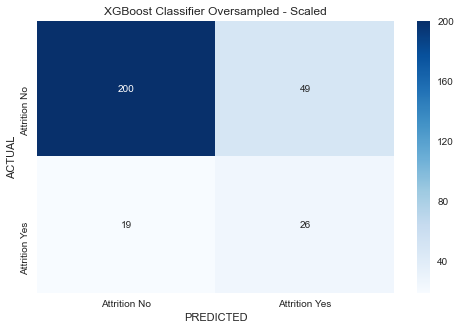

In [99]:
# Model evaluation

print(classification_report(y2_test, yp_XGC2_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y2_test, yp_XGC2_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('XGBoost Classifier Oversampled - Scaled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Though we got slightly better **Accuracy**, it seems that scaling the model would rather make these models losing their **Recall** on predicting *Attrition Yes*.

## MODEL COMPARISON

> Finally we'll compare the models.

In [100]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC_sm, target_names = labels, output_dict = True)).T
report_XGC = pd.DataFrame(classification_report(y_test, yp_XGC_sm, target_names = labels, output_dict = True)).T

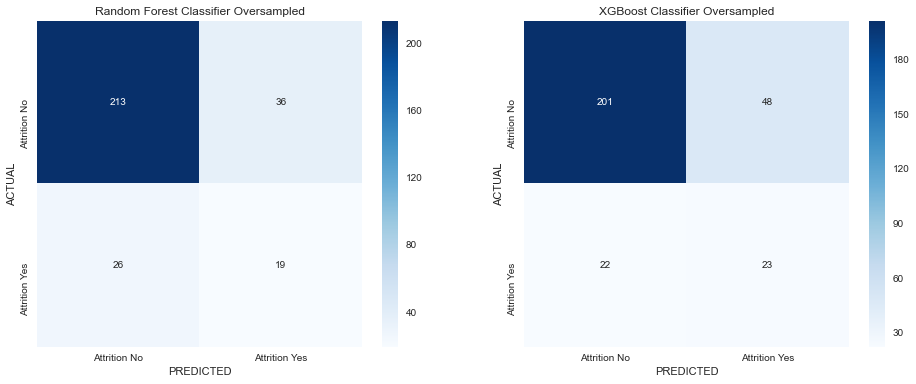

In [101]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.heatmap(confusion_matrix(y_test, yp_RFC_sm), annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(confusion_matrix(y_test, yp_XGC_sm), annot=True, fmt=".0f", ax=ax2, cmap='Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('Random Forest Classifier Oversampled'), ax2.set_title('XGBoost Classifier Oversampled')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [102]:
pd.concat([report_RFC, report_XGC], keys = ['Random Forest Classifier', 'XGBoost Classifier'])

precision    recall  f1-score  \
Random Forest Classifier Attrition No    0.891213  0.855422  0.872951   
                         Attrition Yes   0.345455  0.422222  0.380000   
                         accuracy        0.789116  0.789116  0.789116   
                         macro avg       0.618334  0.638822  0.626475   
                         weighted avg    0.807679  0.789116  0.797499   
XGBoost Classifier       Attrition No    0.901345  0.807229  0.851695   
                         Attrition Yes   0.323944  0.511111  0.396552   
                         accuracy        0.761905  0.761905  0.761905   
                         macro avg       0.612644  0.659170  0.624123   
                         weighted avg    0.812967  0.761905  0.782030   

                                           support  
Random Forest Classifier Attrition No   249.000000  
                         Attrition Yes   45.000000  
                         accuracy         0.789116  
                         macro avg      294.000000  
                         weighted avg   294.000000  
XGBoost Classifier       Attrition No   249.000000  
                         Attrition Yes   45.000000  
                         accuracy         0.761905  
                         macro avg      294.000000  
                         weighted avg   294.000000

It's a little hard to choose the best models. Both models still are not sufficient to predict best result. That being said, I think **XGBoost Classifier** performed better with *oversampled* data. This model are having **Accuracy** of 76% and having 80% **Recall** on *Attrition No*, means that it capable of correctly predicting the not churned employees by 81%, and 51% on churned employees.

               precision    recall  f1-score   support

 Attrition No       0.90      0.81      0.85       249
Attrition Yes       0.32      0.51      0.40        45

     accuracy                           0.76       294
    macro avg       0.61      0.66      0.62       294
 weighted avg       0.81      0.76      0.78       294



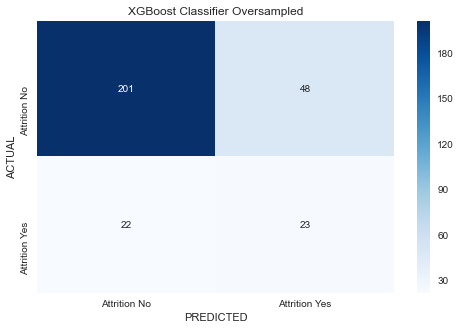

In [106]:
print(classification_report(y_test, yp_XGC_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_XGC_sm), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('XGBoost Classifier Oversampled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()